<a href="https://colab.research.google.com/github/Pellizzari/Tarea2-INF393-II-2019/blob/master/Solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 2 - Fronteras no Lineales </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* similaridad: KNN
* Selección de hı́per-parámetros estructurales en SVM, Arboles de Decisión, k-NN y Redes Neuronales.
* Métodos de *kernel*.
* Extracción de características.
* Múltiples anotaciones

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de discusión y entrega: 8 de Noviembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF393-II-2018]

<hr style="height:2px;border:none"/>

### Paquetes de instalación

Como es usual utilizaremos *numpy, scipy, matplotlib* y *sklearn*. Además de éstas se necesitará instalar **keras**, una librerı́a en python para prototipado rápido de modelos basados en redes neuronales, muy similar en espı́ritu a *sklearn*. La librerı́a puede usar *TensorFlow* o *Theano* como backend, siendo éstas las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos. Para detalles sobre la instalación puede revisar [[1]](#refs) o escribir un email a su ayudante.



La tarea se divide en secciones:

[1.](#primero) Sentiment Analysis en Texto  
[2.](#segundo) pendiente


<a id="primero"></a>

## 1. Sentiment Analysis en Texto

El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud
que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un
tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la polaridad
de un trozo de texto, es decir, clasificar una determinada evaluación escrita (*review*), en que una persona
manifiesta una opinión, como *positiva*, *negativa* o *neutral*. Esto también ha sido extendido a otros medios, como lo es analizar la polaridad de textos en redes sociales.  La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente las personas ası́ como el manejo de negaciones, sarcasmo y abreviaciones en una frase.

<img src="https://formtitanhelpdeskimage.s3.amazonaws.com/70c78f9df2fd5c130e7021644f78f4c5.jpg" title="Title text" width="40%" />


Los datos que usaremos para esta actividad corresponden a un subconjunto de los datos publicados en **Kaggle**,  en  el  contexto  de  una  competencia  organizada  por  la  Universidad  de  Stanford  [[2]](#refs).   Cada  registro disponible corresponderá a una opinión sobre una película, registrada sobre el sitio *Rotten Tomatoes*.  Para empezar  nos  limitaremos  a  estudiar  textos  anotados  como  positivos  o  negativos,  clases  que  codificaremos como +1 y 0 respectivamente. Los datos pueden ser descargados ejecutando el siguiente código en sistema Unix:
```
wget -O train_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train
wget -O test_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev
```

> Cargue los dos conjuntos de datos a ser trabajados, donde la etiqueta ya viene codificada y la dejaremos como negativo (0) y positivo (1).

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd drive/My Drive/Tarea 2

[Errno 2] No such file or directory: 'drive/My Drive/Tarea 2'
/content/drive/My Drive/Tarea 2


In [0]:
import pandas as pd

ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1

fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1

df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values

> a) Describa los datos trabajados, como la cantidad de datos en cada conjunto, largo de los textos, la cantidad de ejemplo por cada clase, o alguna otra forma que piense que pueda ser útil para comprender el problema trabajado.


In [0]:

print("Descripcion datos de training:\n",df_train["Text"].str.len().describe())
print("Descripcion datos de test:\n",df_test["Text"].str.len().describe())
print("Forma de las labels Train:",labels_train.shape)
print("Forma de las labels Test:",labels_test.shape)




Descripcion datos de training:
 count    3554.000000
mean      114.707091
std        51.523887
min         7.000000
25%        76.000000
50%       111.000000
75%       150.750000
max       267.000000
Name: Text, dtype: float64
Descripcion datos de test:
 count    3554.000000
mean      116.467923
std        51.504231
min         9.000000
25%        78.000000
50%       114.000000
75%       151.000000
max       268.000000
Name: Text, dtype: float64
Forma de las labels Train: (3554,)
Forma de las labels Test: (3554,)


Basicamente cada uno de los datos trabajados para training son vectores de 3554 datos, siendo text[n] asociado al label[n] correspondiente. Para test ocurre lo mismo. Ambos conjuntos poseen estadisticas similares.

> b) Construya un conjunto de validación desde el conjunto de entrenamiento para seleccionar modelos. Decida el tamaño dada la cantidad de ejemplos que se tienen para entrenamiento.

In [0]:
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= 1000, random_state=0)



In [0]:
print(df_train_text.shape)
print(labels_train.shape)
print(df_val_text.shape)
print(labels_val.shape)


(2554,)
(2554,)
(1000,)
(1000,)


Se considera un conjuto de validación de 1000 elementos, lo cual se acerca al 30% de la cantidad de datos totales.

> c) Realice un pre-procesamiento a los textos para normalizar un poco su estructura, para ello utilice el código de ejemplo a continuación, donde se pasa el texto a minúsculas (*lower-casing*), se reducen las mútliples letras, se eliminan palabras sin significados como artículos, pronombres y preposiciones (*stop word removal* [[3]](#refs)), además de pasar las palabras a su tronco léxico con la técnica de *lemmatizer* [[4]](#refs). Comente la importancia de un correcto pre-procesamiento en el dominio de lenguaje natural.

In [0]:
import re, time
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words

texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Word Extractor retorna las palabras claves de la sentencia, eliminando aquellas palabras comunes que no agregan valor significativo a la sentencia. Esto, junto a la normalización del texto a ingles y en minusculas permite obtener de manera mas facil el significado detras de cada oración y deberia facilitar su relacionamiento con la evaluacion que cada pelicula recibe.

> d) Construya una representación vectorial a los textos de entrada para poder ser manejados y clasificados por los modelos de aprendizaje. Para ésto utilice el tipo de característica más común, que consiste en contar cuántas veces aparece cada términos/palabras en el texto, denominado **TF** (*term-frequency*). Para esto, se necesita contar con un vocabulario base, el cual se construirá a través de la unión de todas las palabras que observemos en los textos de entrenamiento ¿Cuáles son las palabras más frecuentes?

In [0]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation

vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)

features_val = vectorizer.transform(texts_val)

features_test = vectorizer.transform(texts_test)

vocab = vectorizer.get_feature_names()

def mas_usadas(f,b):
  dist=list(np.array(f.sum(axis=0)).reshape(-1,))
  c=0
  l=[]
  d=dist
  v=b[:]
  for i in range(0,10):
    pos=0
    m=0
    for j in range(0,len(d)):
      if d[j]>m:
          m=d[j]
          pos=j
    d.remove(m)
    l.append(v[pos])
    v.remove(v[pos])
  return l

print ("Palabras mas usadas en los datos de Entrenamiento:\n",mas_usadas(features_train,vocab))
print ("Palabras mas usadas en los datos de Validacion:\n",mas_usadas(features_val,vocab))
print ("Palabras mas usadas en los datos de Test:\n",mas_usadas(features_test, vocab))




Palabras mas usadas en los datos de Entrenamiento:
 ['film', 'movie', 'one', 'ha', 'like', 'make', 'story', 'character', 'good', 'even']
Palabras mas usadas en los datos de Validacion:
 ['film', 'movie', 'like', 'one', 'ha', 'time', 'comedy', 'doe', 'good', 'story']
Palabras mas usadas en los datos de Test:
 ['film', 'movie', 'one', 'ha', 'like', 'story', 'character', 'time', 'make', 'good']


e) Para tener una visión distinta y entender mejor la representación vectorial realizada, visualice los datos en un plano 2D. Para ésto utilice la técnica **LSA** (*Latent Semantic Analysis*) [[5]](#refs) que a diferencia de PCA, **no centra** los datos antes de realizar la descomposicipon SVD, de ésta manera podrá visualizar el espacio semántico de "conceptos" latentes usados en la representación. Coloree cada texto en base a su clase ¿Qué indica lo observado? Comente e interprete los resultados

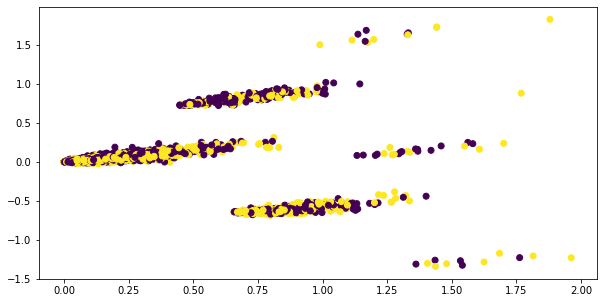

In [0]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()

Se puede observar con LSA que los topicos determinados no diferencian bien entre las opiniones negativas y las positivas, lo que si nos permite observar es que entre las criticas existen tendencias de las cuales almenos 3 son notorias en este grafico, lo cual intuitivamente puede hacer referencia a la forma de escribir o a los modismos utilizados.

> f) Entrene un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma $l_2$). Varíe el parámetro de regularización $C$, en potencias de 10, midiendo el error de predicción obtenido sobre los datos de entrenamiento y validación, construya un gráfico que muestre la variación de ambos errores respecto al parámetro $C$. Explique el significado y valor esperado del parámetro de regularización.


Param C=  0.001
Param C=  0.01
Param C=  0.1
Param C=  1
Param C=  10
Param C=  100
Param C=  1000


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


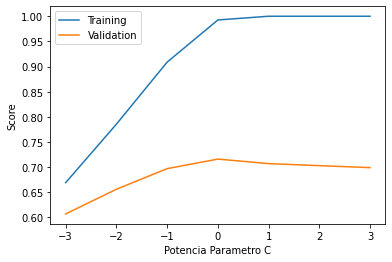

In [0]:
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    print("Param C= ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)

    return model, train_acc, test_acc
Cs = [0.001, 0.01, 0.1 , 1 , 10, 100, 1000]
Csp=[-3,-2,-1,0,1,2,3]

train_l=[]
test_l=[]
for i in Cs:
    model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param=i)
    train_l.append(train_acc)
    test_l.append(test_acc)
    
    
plt.plot(Csp,train_l, label='Training')
plt.plot(Csp,test_l, label='Validation')
plt.xlabel("Potencia Parametro C")
plt.ylabel("Score")
plt.legend()


Se puede observar que tanto para los datos de training como los de validación, teniendo un parametro C=1 la probabilidad deja de variar notoriamente, vale decir, empieza a converger a un valor. Esto indica que el valor esperado de C seria 1. Se observa ademas que los scores tienden a 100% y a un valor cercano al 70% para training y validation respectivamente.

g) Entrene una Máquina de Soporte Vectorial (SVM) con distintos kernels. Similar a lo anterior, construya un gráfico que muestre la variación de ambos errores respecto al parámetro de regularización 𝐶 para cada tipo de kernel que experimente. Explique el significado y valor esperado de los parámetros en este modelo.

Param C=  0.001 Kernel=  linear
Param C=  0.01 Kernel=  linear
Param C=  0.1 Kernel=  linear
Param C=  1 Kernel=  linear
Param C=  10 Kernel=  linear
Param C=  100 Kernel=  linear
Param C=  1000 Kernel=  linear
[0.5027407987470635, 0.7443226311667972, 0.9537979639780736, 0.9988253719655442, 1.0, 1.0, 1.0]


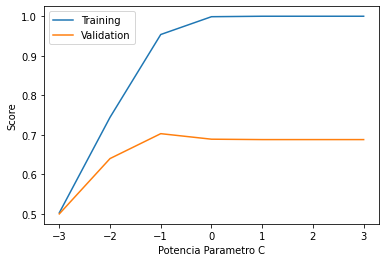

In [0]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel,probability=False):
    print("Param C= ",param, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=param,kernel=kernel, probability=probability) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

train_l=[]
test_l=[]
for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, i,"linear")
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)
plt.plot(Csp,train_l, label='Training')
plt.plot(Csp,test_l, label='Validation')
plt.xlabel("Potencia Parametro C")
plt.ylabel("Score")
plt.legend()


Al utilizar "linear" de kernel, se observa que el parametro C empieza a estancarse en 0,1 a diferencia del anterior modelo. Además, se observa el mismo comportamiento para ambos scores, dejando al training tendiendo a 100%, mientras que para validation tendiendo bajo el 70%.

Param C=  0.001 Kernel=  poly
Param C=  0.01 Kernel=  poly
Param C=  0.1 Kernel=  poly
Param C=  1 Kernel=  poly
Param C=  10 Kernel=  poly
Param C=  100 Kernel=  poly
Param C=  1000 Kernel=  poly
[0.5027407987470635, 0.5027407987470635, 0.5877055599060298, 0.9937353171495693, 0.9984338292873923, 0.9996084573218481, 1.0]


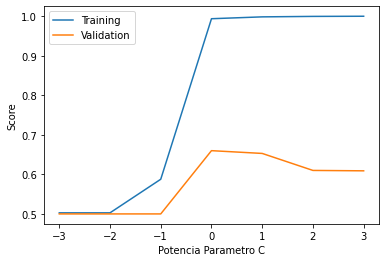

In [0]:
train_l=[]
test_l=[]

for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, i,"poly")
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(Csp,train_l, label='Training')
plt.plot(Csp,test_l, label='Validation')
plt.xlabel("Potencia Parametro C")
plt.ylabel("Score")
plt.legend()

Se observa que para kernel polinomial el parametro C esperado es 1 y que la estabilización es similar a los casos anteriores, lo que cambia notoriamente es como afecta en valor de C para potencias mas bajas y como el score de validación varia de forma mas inestable, bajando para potencias altas de C.

Param C=  0.001 Kernel=  rbf
Param C=  0.01 Kernel=  rbf
Param C=  0.1 Kernel=  rbf
Param C=  1 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  100 Kernel=  rbf
Param C=  1000 Kernel=  rbf
[0.5027407987470635, 0.5027407987470635, 0.5101801096319499, 0.9870790916209867, 1.0, 1.0, 1.0]


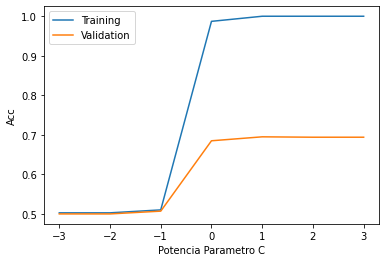

In [0]:
train_l=[]
test_l=[]
for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, i,"rbf")
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(Csp,train_l, label='Training')
plt.plot(Csp,test_l, label='Validation')
plt.xlabel("Potencia Parametro C")
plt.ylabel("Acc")
plt.legend()

Para kernel rbf(radial basis function) se observa que el valor esperado para C es 10, y que su comportamiento para valores mas altos de C obtiene scores iguales consistentemente, mientras que para valores con potencias muy bajas para C el aprendizaje no se logra apropiadamente.

> h) Utilice el algoritmo de similaridad k-NN para intentar resolver el problema. Varíe el parámetro de los vecinos $k$ en un rango que estime conveniente y realice graficos de errores como en las preguntas anteriores. Comente sobre el valor esperado de este parámetro.


(1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024)
Param K=  1
Param K=  2
Param K=  4
Param K=  8
Param K=  16
Param K=  32
Param K=  64
Param K=  128
Param K=  256
Param K=  512
Param K=  1024
[1.0, 0.8931088488645262, 0.7533281127642913, 0.7388410336726703, 0.6511354737666406, 0.6225528582615505, 0.5974941268598277, 0.5595144870790916, 0.6448707909162099, 0.5293657008613939, 0.5066562255285826]


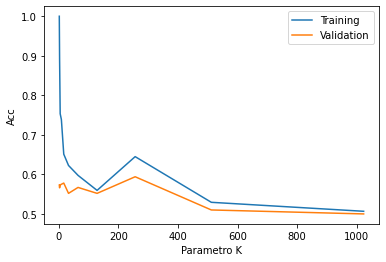

In [0]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
#Ks = np.arange(1, features_train.shape[1], 20)

Ks=(1,2,4,8,16,32,64,128,256,512,1024)
print(Ks)

train_l=[]
test_l=[]
for i in Ks:
    model, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val, i)
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(Ks,train_l, label='Training')
plt.plot(Ks,test_l, label='Validation')
plt.xlabel("Parametro K")
plt.ylabel("Acc")
plt.legend()

Se observa que, mientras mas K se consideran, peor es el entrenamiento, podria considerarse un valor en torno a K=256 como buen valor, dado que con pocos K naturalmente el score sera alto en training pero estara sobre ajustado, mientras que en torno a 256 se denota un aumento en el score.

> i) Entrene un Arbol de Decisión para resolver el problema. Varíe los parámetros de *max depth* y *min samples split* de manera separada, constuyendo gráficos de error respecto a estos parámetros. *Los valores que se presentan son sugerencias, no es necesario utilizar los mismos*. Comente sobre la diferencia entre la selección de estos dos parámetros.


[0.514487079091621, 0.8054032889584964, 0.8672670321064996, 0.9005481597494127, 0.8978073610023493, 0.8981989036805011, 0.9056382145653876, 0.9064212999216915, 0.9021143304620204, 0.9115113547376664, 0.9060297572435395, 0.9072043852779953, 0.9060297572435395, 0.9068128425998434, 0.9052466718872357, 0.9099451840250588, 0.9130775254502741, 0.8950665622552858, 0.9017227877838685, 0.9083790133124511, 0.9048551292090838, 0.9072043852779953, 0.9021143304620204, 0.9028974158183242, 0.9099451840250588, 0.9036805011746281, 0.8981989036805011, 0.90407204385278, 0.8950665622552858, 0.898981989036805, 0.9103367267032106, 0.9048551292090838, 0.8950665622552858, 0.9028974158183242, 0.9032889584964762, 0.8997650743931088, 0.898590446358653, 0.9111198120595145, 0.9048551292090838, 0.9013312451057165, 0.8946750195771339, 0.90407204385278, 0.9048551292090838, 0.9001566170712608, 0.9001566170712608, 0.9115113547376664, 0.908770555990603, 0.8997650743931088, 0.9036805011746281, 0.90407204385278, 0.8985904

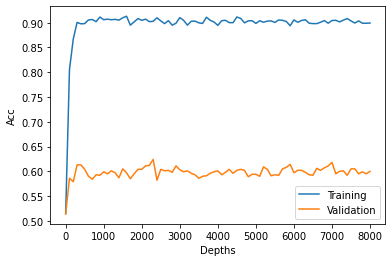

In [0]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d, param_m=2):
    model= Tree()
    #print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Depths = np.arange(1, features_train.shape[1], 100 ) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , 100 ) #choose steps

train_l=[]
test_l=[]
for i in Depths:
    model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, i, 50)
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(Depths,train_l, label='Training')
plt.plot(Depths,test_l, label='Validation')
plt.xlabel("Depths")
plt.ylabel("Acc")
plt.legend()



Se puede observar que al aumentar la profundidad maxima del arbol, este sigue obteniendo scores consistentes basandose en samples constantes.

[0.7654659357870007, 0.706734534064213, 0.7079091620986687, 0.6867658574784652, 0.6648394675019577, 0.6648394675019577, 0.6664056382145653, 0.6664056382145653, 0.6664056382145653, 0.6664056382145653, 0.6664056382145653, 0.6648394675019577, 0.6664056382145653, 0.6648394675019577, 0.6613155833985904, 0.639389193422083, 0.6288175411119812, 0.59592795614722, 0.5787000783085356, 0.5708692247454973, 0.5708692247454973, 0.5708692247454973, 0.5708692247454973, 0.5422866092404072, 0.5293657008613939, 0.514487079091621]


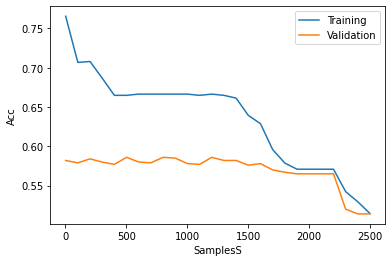

In [0]:
train_l=[]
test_l=[]
for i in SamplesS:
    model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, 50, i)
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(SamplesS,train_l, label='Training')
plt.plot(SamplesS,test_l, label='Validation')
plt.xlabel("SamplesS")
plt.ylabel("Acc")
plt.legend()


Cuando varian las cantidad de samples a una profundidad maxima constante, el entrenamiento pierde score, es producto de que a mayor sample se produce una peor diferenciación entre los datos.



> j) Utilice una Red Neuronal Artificial (ANN) para intentar resolver el problema, como la que se señala a continuación (utilizando el framework de *keras*): entrenada por 25 iteraciones al dataset (*epochs*) con un tamaño de *batch* de 128 para las actualizaciones de los pesos, utilizando *SGD* con una tasa de aprendizaje $0.1$ sobre la función de pérdida binaria de clasificación. La arquitectura de la red contiene una capa de salida con una única neurona que indica la probabilidad de que el texto sea positivo, una capa escondida con número de neuronas $N_h$ y la capa de entrada implícita para $x$. Varíe el parámetro que corresponde al número de neuronas en la capa oculta $N_h$, en potencias de 2, y vuelva a realizar el gráfico de error con respecto al parámetro. Comente.

[2, 4, 8, 16, 32]
Neuron hidden =  2
Neuron hidden =  4
Neuron hidden =  8
Neuron hidden =  16
Neuron hidden =  32
[0.6926389976040684, 0.7008613941253119, 0.6284259984338293, 0.7388410337660214, 0.6914643694762616]


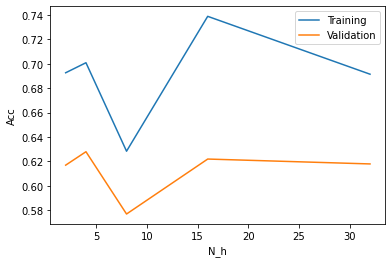

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,6)]
print (N_h)
train_l=[]
test_l=[]
for i in N_h:
    model, train_acc, test_acc = do_ANN(features_train,labels_train,features_val,labels_val, i)
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(N_h,train_l, label='Training')
plt.plot(N_h,test_l, label='Validation')
plt.xlabel("N_h")
plt.ylabel("Acc")
plt.legend()


Se puede observar que al aumentar la cantidad de neuronas sobre la misma capa oculta, el modelo no mejora su score. Para tener un punto de referencia se modela el mismo problema utilizando "relu" en vez de "sigmoid" en la capa oculta.

[2, 4, 8, 16, 32]
Neuron hidden =  2
Neuron hidden =  4
Neuron hidden =  8
Neuron hidden =  16
Neuron hidden =  32
[0.8860610807511428, 0.8590446359586603, 0.8962411900563639, 0.8758809708391397, 0.8860610804710896]


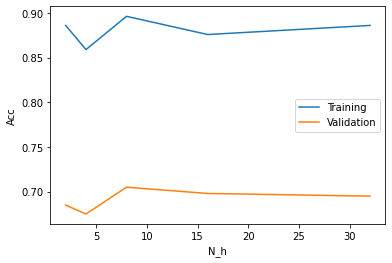

In [0]:
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,6)]
print (N_h)
train_l=[]
test_l=[]
for i in N_h:
    model, train_acc, test_acc = do_ANN(features_train,labels_train,features_val,labels_val, i)
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(N_h,train_l, label='Training')
plt.plot(N_h,test_l, label='Validation')
plt.xlabel("N_h")
plt.ylabel("Acc")
plt.legend()

Utilizando distinto kernel se obtiene mucho mejor resultado con ANN, esto puede ser principalmente por la naturaleza del problema.


---




k) Ahora evalúe sobre el conjunto de pruebas el mejor modelo obtenido, seleccionado en base a la métrica de desempeño en el conjunto de validación. Comente sobre la calidad obtenida en el problema trabajado ¿Es un buen valor? ¿Cuál podría ser un valor de referencia?

Se selecciona SVM con rbf parametro C=10 ya que es el resultado sobre la validación con mejor score.

In [0]:
model, train_acc, test_acc = do_SVM(features_train,labels_train,features_test,labels_test,10,"rbf", probability=True)
print (test_acc)

Param C=  10 Kernel=  rbf
0.7025886325267304


Es un buen valor, dado que el aprendizaje obtuvo un score mejor a obtener una predicción de forma mas arbitatria (como tirar una moneda). Un buen punto de referencia para esto fue el resultado de score en la validación del modelo.

l) Para comparar sus resultados utilice el modelo VADER (Valence Aware Dictionary and sEntiment Reasoner) [6], el cual entrega una score de predicción a nivel léxico (de palabras que comúnmente se asocian a una orientiación positiva o negativa). Este modelo construido manualmente no requiere entrenamiento, por lo que solo debe evaluar en conjunto de pruebas realizando predicciones del texto bruto (sin pre-procesamiento). Comente.

In [0]:
!pip install vaderSentiment

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)

0.6359032076533483

Comparado con lo obtenido con Vader se obtuvo un resultado mejor por un 7% aproximadamente, lo cual es una mejora considerable sobre el metodo de predicción a nivel léxico.

m) Bajo la idea del modelo VADER realice un análisis de qué palabras su modelo tiende a considerar como positivas o negativas por si solas. Algunos de los modelos estudiados en esta sección realizan una predicción probabilista, utilice uno de éstos para verificar lo solicitado. Sobre la representación TF genere datos de entradas que contengan una sola palabra del vocabulario para evaluar que predicción les genera su modelo a esas palabras. Muestre las palabras más negativas y positivas en el vocabulario consideradas por su modelo. Comente.

In [0]:
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)

print(np.argmax(word_scores,axis=0))


[ 565 3333]


In [0]:
print(vocab[565])
print(vocab[3333])

bad
heart


Se puede observar que la palabra mas negativa fue "bad" (lo cual hace sentido), mientras que la mas positiva fue "heart" lo cual en el contexto de una critica positiva tiene sentido aunque hayan algunas palabras que uno esperase ser mas positivas que probablemente no fueron tan dominantes en el entrenamiento.


>n) Intente mejorar los resultados de otra manera. Varíe el pre-procesamiento realizado a los datos en c), por ejemplo eliminar símbolos, números o aplicar la técnica de stemmming [7] en lugar de lemmatization para llevar a su tronco léxico.

In [0]:
from nltk.stem.porter import PorterStemmer

def base_word_stemmer(word):
    wordstemmer = PorterStemmer()
    return wordstemmer.stem(word)
def word_extractor_stemmer(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word_stemmer(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words

texts_train = [word_extractor_stemmer(text) for text in df_train_text]
texts_val = [word_extractor_stemmer(text) for text in df_val_text]
texts_test = [word_extractor_stemmer(text) for text in df_test_text]

vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)
features_test = vectorizer.transform(texts_test)



In [0]:
model, train_acc, test_acc = do_SVM(features_train,labels_train,features_test,labels_test,10,"rbf", probability=True)
print (test_acc)

Param C=  10 Kernel=  rbf
0.7194710185706247


Usando Stemming se obtuvo, utilizando nuevamente SVM con C=10 y rbf, un resultado levemente mejor sobre los datos de test.

>o) Varíe la representación utilizada actualmente por alguna otra que ayude a mejorar el desempeño, por ejemplo reducir el peso de una palabra si es que aparece en muchos textos: TF-IDF. Existen varias opciones que podría realizar para mejorar el desempeño, por ejemplo reducir el vocabulario a las $K$ palabras más frecuentes, eliminar las palabras menos frecuentes, normalizar la representación, utilizar n-gramas, entre otras.

Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Considerando todas las palabras el score es: 0.7284749577940349


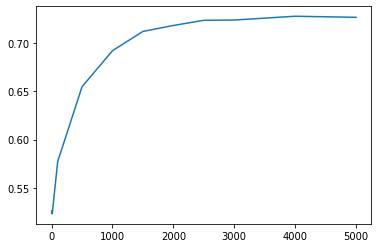

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

P=[1,10,100,100,500,1000,1500,2000,2500,3000,4000,5000,None]
l=[]
for i in P:
  tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=i, norm='l2', use_idf=True, sublinear_tf=False)
  tfidf_model.fit(texts_train)
  features_train=tfidf_model.transform(texts_train)
  features_val =tfidf_model.transform(texts_val)
  features_test =tfidf_model.transform(texts_test)
  model, train_acc, test_acc = do_SVM(features_train,labels_train,features_test,labels_test,10,"rbf", probability=True)
  l.append(test_acc)
plt.plot(P,l)
print("Considerando todas las palabras el score es:",test_acc)


Usando TF-IDF y variando K dentro del rango de valores posibles de cantidad de palabras se puede observar que mientras mas palabras son consideras, mejor es el score obtenido. Se puede considerar tambien que para un valor entre 2000 palabras, el score obtenido no varia mucho en comparación a usar todas las palabras lo cual ahorraria capacidad computacional.

Considerando todas las palabras de igual forma se obtiene una mejora frente al anterior metodo utilizado.

> p) Utilice métricas auxiliares para entender en qué falla su mejor modelo obtenido hasta el momento. ¿La información entregada indica cómo se podría mejorar o cual sería la causa de la falla?

In [0]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))

score_the_model(model, features_test, labels_test )

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.73      0.74      0.73      1803
           +       0.73      0.72      0.72      1751

    accuracy                           0.73      3554
   macro avg       0.73      0.73      0.73      3554
weighted avg       0.73      0.73      0.73      3554



Se puede observar que el modelo predice tanto comentarios negativos como positivos con la misma precision pero difieren levemente en el recall lo puede indicar que en el caso de los comentarios positivos se generas mas falsos positivos (puede ser producto del sarcasmo por ejemplo).

> q) Algo que se puede modificar en algunos modelos de aprendizaje es poner peso en cada una de las clases, por ejemplo si una clase es de mayor interés que las otras e interesa reducir más su error. En *sklearn* ésto puede ser realizado con el parámetro de *class_weights*. Por ejemplo, asigne que detectar los textos negativos me interesa 5 veces más que detectar los textos positivos. Comente.

In [0]:
classes_weights = {0: 5, 1: 1} #or choose..
def do_SVM_weighted(x,y,xv,yv, param, kernel,weights,probability=False):
    print("Param C= ",param, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=param,kernel=kernel, probability=probability,class_weight=weights) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

model, train_acc, test_acc = do_SVM_weighted(features_train,labels_train,features_test,labels_test,10,"rbf",classes_weights, probability=True)

score_the_model(model, features_test, labels_test)

Param C=  10 Kernel=  rbf
Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.73      0.74      0.73      1803
           +       0.73      0.72      0.72      1751

    accuracy                           0.73      3554
   macro avg       0.73      0.73      0.73      3554
weighted avg       0.73      0.73      0.73      3554



Se puede observar que cambiando los pesos no hubo ningun cambio en las precisiones o en el recall de cada caso.

> r) Visualice la clasificación que realiza su mejor modelo sobre algunos textos de pruebas ¿Qué entega mas información, una predicción categórica o una continua? ¿Cuál podría ser el beneficio de una o de otra? Comente

In [0]:
test_pred = model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  0.0 -- Pred sent:  [0.55823333 0.44176667]
Raw text:  [a] slummer .

True sent:  0.0 -- Pred sent:  [0.90391984 0.09608016]
Raw text:  the script is high on squaddie banter , low on shocks .

True sent:  1.0 -- Pred sent:  [0.17159487 0.82840513]
Raw text:  dogtown & z-boys evokes the blithe rebel fantasy with the kind of insouciance embedded in the sexy demise of james dean .

True sent:  0.0 -- Pred sent:  [0.79459398 0.20540602]
Raw text:  something akin to a japanese alice through the looking glass , except that it seems to take itself far more seriously .

True sent:  0.0 -- Pred sent:  [0.4303822 0.5696178]
Raw text:  the innocence of holiday cheer ain't what it used to be .

True sent:  1.0 -- Pred sent:  [0.67766037 0.32233963]
Raw text:  going to this movie is a little like chewing whale blubber - it's an acquired taste that takes time to enjoy , but it's worth it , even if it does take 3 hours to get through .

True sent:  0.0 -- Pred sent:  [0.48113944 0.51886056

Una predicción continua entrega mas información que una categorica, ya que se puede observar con que tanta certeza se obtuvo cada respuesta y posiblemente notar facilmente donde se producen los falsos negativos. Por otra parte una predicción categorica es mucho mas facil de interpretar pero mucho mas complicado entender cómo es que el modelo se equivoca.


> s) Comente sobre el desempeño obtenido por los diferentes modelos de aprendizaje utilizados al enfrentar el problema, ¿Dónde pareciera estar la mejora? ¿En la variación de los modelos y sus parámetros o en la modificación de la representación? ¿Cuál modelo de aprendizaje le parece mejor en base a su criterio? ya sea desempeño, tiempo de ejecución comodidad en las decisiones involucradas, etc.

Aparentemente el mejor manejo de la representación de los datos permite obtener mejores resultados. Variando los modelos se observo que los que se ajustaban al problema tendían a obtener scores similares, mientras que los que no se ajustaban de buena manera como KNN simplemente no entrenaban apropiadamente.

En el caso de ANN el modelo tampoco logro ajustarse apropiadamente, pero utilizando un distinto kernel si lo hizo, esto producto de la naturaleza del problema. 

SVM fue el modelo mas facil de usar e interpretar, dado que solo modificando el kernel podiamos observar mejoras o perdidas en los scores y resulta menos ambiguo de entender (almenos para nosotros) que una red neuronal, la cual tambien era modificable con los kernels de las capas internar pero habian muchos mas factores a considerar, como el kernel de activación en la capa de salida, la cantidad de capaz o el tamaño de los epochs.


<a id="segundo"></a>

## 2. Problema de Múltiples Anotaciones

El aprendizaje supervisado visto en clases da cuenta que existe una única posible etiqueta $z$ (*ground truth*) asociada a un dato $x$ para poder aprender de los datos. Sin embargo, la definición del *ground truth* en algunos casos puede resultar bastante difícil de definir o bastante costoso, por ejemplo en problemas médicos donde se deben realizar invasivos exámenes para conocer la "verdad absoluta". Como alternativa se pueden recolectar múltiples anotaciones desde personas inexpertas en el área para poder estimar el *ground truth*. 

<img src="http://www.irishenvironment.com/wp-content/uploads/2013/11/crowdsourcing.jpg" title="Title text" width="40%" />

En esta actividad se trabajará en el caso en que contamos con múltiples anotaciones por cada dato de entrada $x_i$ dadas por personas inexpertas a través de Amazon Mechanical Turk (__[AMT](https://www.mturk.com/)__), es decir, $y^{(1)}, y^{(2)} \ldots y^{(T_i)}$. El problema de predicción trabajado será el mismo de la actividad anterior, el análisis de sentimiento de un extracto de texto en Rotten Tomatoes. Los datos trabajados [[8]](#refs) pueden ser descargados de la página del autor.

In [0]:
import pandas as pd
df = pd.read_csv("mturk_answers.csv") 

De esta manera trabajaremos con el archivo *mturk_answers.csv* en la carpeta *sentiment polarity* que se puede cargar con pandas. En este archivo se tendrán múltiples filas/registros por cada dato de entrenamiento, cada uno representando la etiqueta que entregó una persona (*worker*) a ese dato, los detalles de columnas son:
* *WorkerId*: identificador de la persona que etiquetó/anotó el dato
* *Input.id*: identificador del dato a etiquetar/anotar
* *Input.original_sentence*: texto original del dato
* *Input.stemmed_sent*: texto pre-procesado
* *Input.true_sent*: sentimiento real (*ground truth*) del dato
* *Answer.sent*:   etiqueta/anotación que entregó la persona


> El objetivo de la actividad será el de obtener un modelo predictor del *ground truth* sin entrenar directamente con esto, sino que utilizar las múltiples anotaciones de las personas

### Importante
* Deberá crear un conjunto aleatorio de pruebas que solo contenga los textos y el sentimiento *ground truth* (sin repeticiones)
* Los valores de *ground truth* están **solo para evaluar**, no puede utilizarlos para entrenar o tomar decisiones en su modelo.
* La métrica de evaluación será el *accuracy score*


#### Sugerencias
Para representar los textos, a diferencia de lo visto en la sección 1, se puede utilizar lo que son la representación vectorial de palabras (*word vectors*), a través de modelos especializados entrenados para aprender una representación en que palabras similares estén cercanas en el espacio vectorial. Puede utilizar los vectores livianos de __[GLOVE](https://nlp.stanford.edu/projects/glove/)__ en su versión entradas en textos de Wikipedia con 6 billones de palabras/tokens.
```python
EMBEDDING_DIM = 300
GLOVE_FILE = "./glove.6B.%dd.txt"%(EMBEDDING_DIM)
embeddings_index = {}
with open(GLOVE_FILE) as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
...
embeddings_index.get(word)
```
> Para descargar GLOVE
```
wget http://nlp.stanford.edu/data/glove.6B.zip
```


In [0]:
df

,WorkerId,Input.id,Input.original_sentence,Input.stemmed_sent,Input.true_sent,Answer.sent
0,A2HD5XMM48KKJW,4518,"the cast is phenomenal , especially the women .",cast phenomen especi women,pos,pos
1,A2HD5XMM48KKJW,10415,"the metaphors are provocative , but too often ...",metaphor provoc often viewer left puzzl mechan...,neg,neg
2,A2HD5XMM48KKJW,7098,while there's something intrinsically funny ab...,there someth intrins funni sir anthoni hopkin ...,neg,pos
3,A2HD5XMM48KKJW,4396,a harrowing account of a psychological breakdo...,harrow account psycholog breakdown,pos,neg
4,A2HD5XMM48KKJW,2812,". . . a visually seductive , unrepentantly tr...",visual seduct unrepentantli trashi rice instal...,pos,pos
...,...,...,...,...,...,...
27741,A4F3BK6J0PCVH,7144,the movie fails to live up to the sum of its p...,movi fail live sum part,neg,neg
27742,A4F3BK6J0PCVH,8293,the balkans provide the obstacle course for th...,balkan provid obstacl cours love good woman,neg,neg
27743,A4F3BK6J0PCVH,2929,this is a smart movie that knows its classical...,smart movi know classic music know freud know ...,pos,pos
27744,A4F3BK6J0PCVH,6902,"there's something with potential here , but th...",there someth potenti movi decid lavinia conser...,neg,neg


Mostramos el dataset y logramos diferenciar cada atributo de este. Lo que se buscará hacer sera convertir Answer.sent e Input.true_sent a numeros enteros. Para Answer.sent se sacará el promedio de las votaciones hechas por las personas sobre cada oración. Esto, en conjunto a Input.true_sent (ground truth) y Input.stemmed_sent seran los datos con los que trabajaremos, siendo los promedios de los Input.true_sent el la etiqueta para cada Input.stemmed_sent.

Con esto trabajaremos de forma similar a lo realizado en la parte 1 de la tarea. Dado que la naturaleza del problema es similar (muchas caracteristicas para cada dato) utilizaremos el metodo predictor con mejor resultado anteriormente el cual fue SVM con rbf.

Utilizaremos Input.id para identificar las sentencias de forma facil.

In [0]:
palabras = dict()

#j=rows
for i, j in df.iterrows():
    if j["Input.id"] not in palabras.keys():
        if j["Input.true_sent"]=="pos":
            palabras[j["Input.id"]] = (j["Input.stemmed_sent"], list(), 1) 
        else:
            palabras[j["Input.id"]] = (j["Input.stemmed_sent"], list(), 0) 


    if j["Answer.sent"]=="pos":
        palabras[j["Input.id"]][1].append(1)
    else:
        palabras[j["Input.id"]][1].append(0)

#print(palabras)
from numpy import median
labels= list()
ground_truth = list()
texto = list()
for _,(palabra, label, ground) in palabras.items():
    prom = median(label) 
    texto.append(palabra)
    labels.append(round(prom,0))
    ground_truth.append(ground)
#print(labels)
print("Forma de las labels Train:",len(labels))

Forma de las labels Train: 4999


Separamos entre conjuntos de prueba y validación considerando la proporción del 30% para validación y vectorizamos los datos utilizando CountVectorizer.



In [0]:
from sklearn.model_selection import train_test_split
train_text, val_text, labels_train, labels_val  = train_test_split(texto, labels, test_size= 1500, random_state=0)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(train_text)
vectorizer.transform(train_text)

vectorizer.fit(train_text)
features_train = vectorizer.transform(train_text)
features_val = vectorizer.transform(val_text)




Utilizamos SVM con rbf y probamos con distintos valores C para poder determinar uno.

Param C=  0.001 Kernel=  rbf
Param C=  0.01 Kernel=  rbf
Param C=  0.1 Kernel=  rbf
Param C=  1 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  100 Kernel=  rbf
Param C=  1000 Kernel=  rbf
[0.5141468991140326, 0.5141468991140326, 0.5147184909974278, 0.9782795084309803, 1.0, 1.0, 1.0]


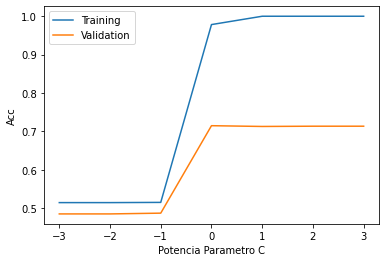

In [0]:
train_l=[]
test_l=[]
for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val,i,"rbf", probability=True)
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(Csp,train_l, label='Training')
plt.plot(Csp,test_l, label='Validation')
plt.xlabel("Potencia Parametro C")
plt.ylabel("Acc")
plt.legend()



Se observa que en C=1 el score de validación empieza a comportarse de forma constante. Con esto se decide entrenar con C=1 y comparar los valores respecto a las etiquetas reales.

In [0]:
vectorizer.fit(texto)
features_test = vectorizer.transform(texto)
model, train_acc, test_acc = do_SVM(features_test,labels,features_test,ground_truth,1,"rbf", probability=True)



Param C=  1 Kernel=  rbf


In [0]:
print("Score de etiquetas entrenadas vs etiquetas reales",test_acc)

Score de etiquetas entrenadas vs etiquetas reales 0.8795759151830366


Se obtiene como resultado una accuracy del 88% aproximadamente, lo cual es un resultado mas alto de lo que esperabamos, haciendo contraste con lo hecho en la parte 1.

<a id="refs"></a>
## Referencias
[1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/  
[2] https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews  
[3] https://en.wikipedia.org/wiki/Stopwords  
[4] https://en.wikipedia.org/wiki/Lemmatisation  
[5] Landauer, T. K., Foltz, P. W., & Laham, D. (1998). *An introduction to latent semantic analysis*. Discourse processes, 25(2-3), 259-284.  
[6] https://github.com/cjhutto/vaderSentiment  
[7] https://en.wikipedia.org/wiki/Stemming  
[8] Rodrigues, F., Pereira, F., & Ribeiro, B. (2013). *Learning from multiple annotators: distinguishing good from random labelers*. Pattern Recognition Letters, 34(12), 1428-1436.